DATA

In [10]:
import tensorflow as tf
from visualize_activations import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


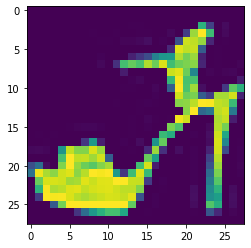

In [12]:
 plt.imshow(x_train[9])

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

In [15]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
x_train=np.expand_dims(x_train,axis=3);
x_test=np.expand_dims(x_test,axis=3);
x_validation=np.expand_dims(x_validation,axis=3)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape,"x_validation shape:", x_validation.shape)

x_train shape: (48000, 28, 28, 1) x_test shape: (10000, 28, 28, 1) x_validation shape: (12000, 28, 28, 1)


MLP

In [17]:
model = tf.keras.Sequential(name="Flatten")
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model shape:", model.output_shape)

model shape: (None, 784)


In [18]:
model.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model shape:", model.output_shape)
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model shape:", model.output_shape)

model shape: (None, 32)
model shape: (None, 64)


In [19]:
model.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
random_weights = model.get_weights()
print("model shape:", model.output_shape)

model shape: (None, 10)


In [20]:
model.summary()

Model: "Flatten"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Softmax_10 (Dense)           (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [11]:
callback=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model.compile(optimizer=opt, loss="categorical_crossentropy")
history=model.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7148 - val_loss: 0.5076
Epoch 2/200
240/240 [==============================] - 0s 989us/step - loss: 0.4550 - val_loss: 0.4408
Epoch 3/200
240/240 [==============================] - 0s 990us/step - loss: 0.4206 - val_loss: 0.4171
Epoch 4/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3946 - val_loss: 0.4020
Epoch 5/200
240/240 [==============================] - 0s 1000us/step - loss: 0.3791 - val_loss: 0.3903
Epoch 6/200
240/240 [==============================] - 0s 992us/step - loss: 0.3616 - val_loss: 0.3840
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.3980
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3368 - val_loss: 0.3643
Epoch 9/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3299 - val_loss: 0.3637
Epoch 10/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3218

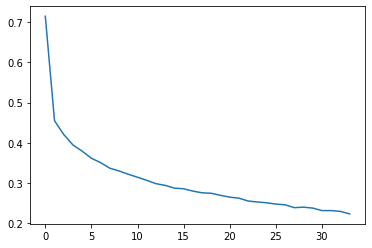

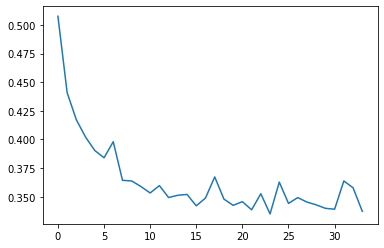

In [13]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.figure(2)
plt.plot(history.history['val_loss'])

In [14]:
y_prediction=model.predict(x=x_test,batch_size=200,callbacks=[callback])
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.875 
 Confusion Matrix: [[834   2  17  37   4   1  95   0  10   0]
 [  3 966   2  22   5   0   2   0   0   0]
 [ 16   0 812  14 103   0  54   0   1   0]
 [ 26   9  12 882  44   0  23   0   4   0]
 [  0   1 105  24 818   2  49   0   1   0]
 [  0   0   0   0   0 956   0  17   2  25]
 [137   2 100  28  83   2 626   0  22   0]
 [  0   0   0   0   0  32   0 923   0  45]
 [  5   1   6   4   5   6   7   2 964   0]
 [  0   0   0   0   0  10   2  19   0 969]]


REPETITION

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)

model.set_weights(random_weights)

model.compile(optimizer=opt, loss="categorical_crossentropy")
history=model.fit(x=x_train,y=y_train,epochs=200,batch_size=200,validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7061 - val_loss: 0.4920
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4570 - val_loss: 0.4381
Epoch 3/200
240/240 [==============================] - 0s 996us/step - loss: 0.4188 - val_loss: 0.4406
Epoch 4/200
240/240 [==============================] - 0s 995us/step - loss: 0.3975 - val_loss: 0.4103
Epoch 5/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3791 - val_loss: 0.3937
Epoch 6/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3642 - val_loss: 0.4257
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3540 - val_loss: 0.3812
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.3722
Epoch 9/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3320 - val_loss: 0.3711
Epoch 10/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3251 - va

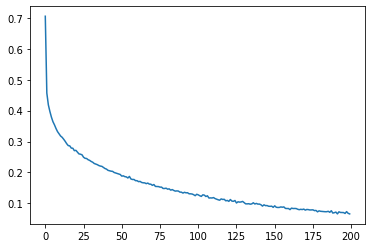

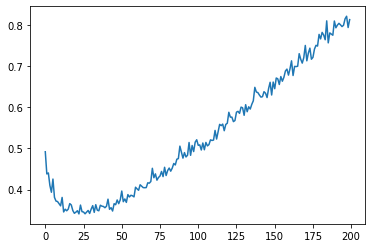

In [16]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.figure(2)
plt.plot(history.history['val_loss'])

In [17]:
y_prediction=model.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8667 
 Confusion Matrix: [[822   6  21  20   2   1 118   1   9   0]
 [  2 978   1  11   3   0   4   0   1   0]
 [ 23   1 807  11  98   0  59   0   1   0]
 [ 40  21  23 820  47   0  42   0   6   1]
 [  2   2 116  23 807   1  47   1   1   0]
 [  0   0   1   0   0 948   0  33   4  14]
 [135   3 114  15  86   1 631   0  15   0]
 [  1   0   0   0   0  21   0 953   2  23]
 [ 11   1  11   6   5   3   9   5 949   0]
 [  0   0   0   1   0  15   1  30   1 952]]


CNN